# Neural network for determining the sign of the sum of two numbers
### by Karan

In [207]:
import numpy as np
import matplotlib.pyplot as plt

In [208]:
import random

## 1 . Prepare training and test data (typically loaded from file) 

- Here we generate it

In [209]:
rangeData = 20                             # Numbers from [-rangeData,+rangeData]
lenData = 1000                             # How many pairs of numbers do we generate
testProportion = 0.3                       # 30% testing, 70% training 
testEnd = round(lenData * testProportion)  # How many pairs of numbers are used for testing

- Generate 1000 pairs of numbers as 1000 seperate inputs for our network

In [210]:
dataIn = np.random.randint(-rangeData, rangeData+1, size=(lenData, 2))

- Generate the corresponding 1000 output values. These will be the sum of the two inputs.
- We do not tell the network that it is the sum. The network shall learn this by itself.

In [211]:
### added 0.1 so that 0 will return a positive sign (output 1) ###
dataOut = np.sign(dataIn[:,0] + dataIn[:,1]+0.1)

Sort them into categories [negative, positive]

-1 (negative) \\(\rightarrow \\) [1,0]

+1 (positive) \\(\rightarrow \\) [0,1]

In [212]:
dataOut = np.transpose(np.array([(-dataOut + 1)/2, (dataOut + 1)/2]))

In [213]:
dataOut

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

- Adding a '1' element to each input pair (related to bias - more on this later)

In [214]:
dataIn = np.concatenate([np.ones([lenData,1]), dataIn], axis=1)

- The final data sets and 1 example each

In [215]:
testingIn   = dataIn[0:testEnd]
testingOut  = dataOut[0:testEnd]
trainingIn  = dataIn[testEnd:]
trainingOut = dataOut[testEnd:]

In [216]:
print( testingIn[0] )
print( testingOut[0] )
print( trainingIn[0] )
print( trainingOut[0] )

[ 1.  3. 19.]
[0. 1.]
[  1. -13.  20.]
[0. 1.]


## 2. Setting up neural network

![Sign_network.png](Sign_network.png)

Input layer length: 3 (1 bias + 2 numbers)

Hidden layer length: 5 (5 neurons) \\( \rightarrow\\) We can change this value to improve performance

Output layer length: 2 (result catergories - negative vs positive)

In [217]:
numLayers = [3,5,2]

### 2.1 Initialize weights: Numbers in the range from -2 to 2

- We need a starting point for our weights. Let's select them randomly.
- Be careful about the dimension of the arrays:

    - weights[0] connects the input layer with the hidden layer
    - weights[1] connects the hidden layer with the output layer

In [218]:
weights = [
    4 * np.random.random_sample([numLayers[0],numLayers[1]]) - 2,
    4 * np.random.random_sample([numLayers[1],numLayers[2]]) - 2,
]

In [219]:
weights

[array([[-1.11419829,  0.96359581, -1.63354423, -1.25406332, -1.78349768],
        [-1.05130278,  1.17970251, -0.75991716,  1.13802268, -1.60036202],
        [ 1.96664841,  0.41978333, -0.91681713, -1.35381269,  1.43680839]]),
 array([[ 0.2027537 ,  0.79242585],
        [ 0.09014361, -1.22220264],
        [ 0.74339056,  1.84785533],
        [-1.6762798 ,  0.9233014 ],
        [-0.93302289,  1.27096236]])]

### 2.2 Activation function

- Typically a monotonuous function that rescales a value to the range [0,1]
- Here we use the sigmoid function:

Activation function:
\\( a(x) = \frac{1}{1+\exp(-x)} \\)

Derivative:
\\( a'(x) = \frac{\exp(-x)}{\left[1+\exp(-x)\right]^2} \\)

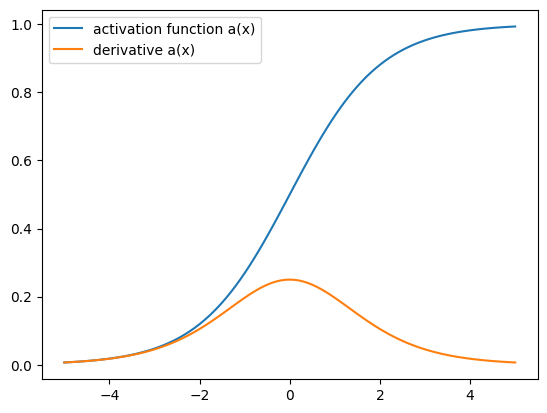

In [220]:
def activation(x):
    return 1/(1+np.exp(-x))

def activationDerivative(x):
    return np.exp(-x)/(1+np.exp(-x))**2

x = np.linspace(-5,5,101)
y1 = activation(x)
y2 = activationDerivative(x)
plt.plot(x,y1, label ='activation function a(x)') 
plt.plot(x,y2, label ='derivative a(x)')
plt.legend()
plt.show()

### 2.3 Calculate output of our neural network

The value of a neuron is given as the dot product of the two vectors: 
- weights 
- value of the neurons in the previous layer (including bias: value 1)

This value is then rescaled by the activation function.

First, calculate the hidden layer:
\\( h_i = a\left(w_{0i}^{(0)}x_0 + w_{1i}^{(0)}x_1 + w_{2i}^{(0)}x_2\right) \\)

Then, calculate the output layer:
\\( y_j = a\left(w_{0j}^{(1)}h_0 + w_{1j}^{(1)}h_1 + w_{2j}^{(1)}h_2 + w_{3j}^{(1)}h_3 + w_{4j}^{(1)}h_4 \right) \\)

In [221]:
def calculateNext(x,w):
    # x: input
    # w: weights
    return activation(np.dot(x, w))


In [222]:
testIndex = 10
calculateNext( 
    calculateNext( trainingIn[testIndex], weights[0] ),
    weights[1] 
    )

array([0.56625216, 0.39984725])

In [223]:
calculateNext( 
    calculateNext( trainingIn, weights[0] ),
    weights[1]
)

array([[0.32519247, 0.88699149],
       [0.24232395, 0.69213976],
       [0.16992843, 0.42582645],
       ...,
       [0.35532512, 0.68572638],
       [0.28233607, 0.94109972],
       [0.34521441, 0.69877408]])

The calculation of one of these output values corresponds to:

\\( y_j = a\Big[w_{0j}^{(1)}a\left(w_{00}^{(0)}x_0 + w_{10}^{(0)}x_1 + w_{20}^{(0)}x_2\right) \\ \quad\quad + w_{1j}^{(1)}a\left(w_{01}^{(0)}x_0 + w_{11}^{(0)}x_1 + w_{21}^{(0)}x_2\right) \\ \quad\quad + w_{2j}^{(1)}a\left(w_{02}^{(0)}x_0 + w_{12}^{(0)}x_1 + w_{22}^{(0)}x_2\right) \\ \quad\quad + w_{3j}^{(1)}a\left(w_{03}^{(0)}x_0 + w_{13}^{(0)}x_1 + w_{23}^{(0)}x_2\right) \\ \quad\quad + w_{4j}^{(1)}a\left(w_{04}^{(0)}x_0 + w_{14}^{(0)}x_1 + w_{24}^{(0)}x_2\right) \Big] \\)

### 2.4 Functions: Calculate accuracy and individual error

### - Accuracy: 
What is the rate at which the output is predicted correctly (only correct and wrong matter)?

In [224]:
def accuracy(testingIn,testingOut,weights):
    return 1 - np.sum( 
                np.abs( 
                    np.sign (
                        np.abs( testingOut.argmax(axis=1) - calculateNext( calculateNext( testingIn, weights[0] ), weights[1]).argmax(axis=1))
                    ) ) )/ testEnd

In [225]:
accuracy(testingIn,testingOut,weights)

0.51

- So far, output is random 

### - Error (better for learning): 
For each input the 2 component output vector is compared to the correct 2 component output vector

\\( \Delta = (\vec{y}-\vec{Y})^2=\sum_j (y_j-Y_j)^2 \\)

\\( y_j \\): Predicted output of neuron \\( j \\) (Number between 0 and 1)

\\( Y_j \\): Correct result of neuron \\( j \\) (Number exactly 0 or 1)

In [226]:
def error(predictedValues, correctValues):
    return np.sum(predictedValues - correctValues)**2 

In [227]:
error(calculateNext( calculateNext(trainingIn[testIndex], weights[0]),weights[1]), trainingOut[testIndex])

0.0011492496878308183

Or as one long formula

\\(\Delta = \sum_j \Big( a\Big[w_{0j}^{(1)}a\left(w_{00}^{(0)}x_0 + w_{10}^{(0)}x_1 + w_{20}^{(0)}x_2\right) \\ \quad\quad\quad\quad + w_{1j}^{(1)}a\left(w_{01}^{(0)}x_0 + w_{11}^{(0)}x_1 + w_{21}^{(0)}x_2\right) \\ \quad\quad\quad\quad + w_{2j}^{(1)}a\left(w_{02}^{(0)}x_0 + w_{12}^{(0)}x_1 + w_{22}^{(0)}x_2\right) \\ \quad\quad\quad\quad + w_{3j}^{(1)}a\left(w_{03}^{(0)}x_0 + w_{13}^{(0)}x_1 + w_{23}^{(0)}x_2\right) \\ \quad\quad\quad\quad + w_{4j}^{(1)}a\left(w_{04}^{(0)}x_0 + w_{14}^{(0)}x_1 + w_{24}^{(0)}x_2\right) \Big] -Y_j\Big)^2 \\)

### 2.5 Function: Calculate gradient (d Error / d weight)

- All derivatives with respect to the individual weights (Use chain rule)

\\( \frac{\partial }{\partial w_{ij}^{(1)}}\Delta = 2(y_j-Y_j) \cdot a'\left(w_{0j}^{(1)}h_0 + w_{1j}^{(1)}h_1 + w_{2j}^{(1)}h_2 + w_{3j}^{(1)}h_3 + w_{4j}^{(1)}h_4 \right)\cdot a\left(w_{0i}^{(0)}x_0 + w_{1i}^{(0)}x_1 + w_{2i}^{(0)}x_2\right)\\)

\\( \frac{\partial }{\partial w_{ki}^{(0)}}\Delta = \sum_j 2(y_j-Y_j) \cdot a'\left(w_{0j}^{(1)}h_0 + w_{1j}^{(1)}h_1 + w_{2j}^{(1)}h_2 + w_{3j}^{(1)}h_3 + w_{4j}^{(1)}h_4 \right)\cdot w_{ij}^{(1)} \cdot a'\left(w_{0i}^{(0)}x_0 + w_{1i}^{(0)}x_1 + w_{2i}^{(0)}x_2\right)\cdot x_k\\)

In [228]:
def gradient(x,w,correctValues):
    #
    dot = np.dot(x,w[0])
    hiddenValues = activation(dot)
    hiddenValuesDerivative = activationDerivative(dot)
    hiddenValueDerivative2 = activationDerivative(np.dot(hiddenValues,w[1]))
    diff = calculateNext(hiddenValues, w[1]) - correctValues
    
    grad1 =np.array([
        2 * diff * hiddenValueDerivative2 * hiddenValues[i]
        for i in range(numLayers[1])])
    grad0 = np.array([[sum(
        diff * hiddenValueDerivative2 * w[1][i,:] * hiddenValuesDerivative[i] * x[k])
        for i in range(numLayers[1])]
                       for k in range(numLayers[0])])
        
    return[grad0, grad1]

In [229]:
gradient(trainingIn[testIndex], weights, trainingOut[testIndex])

[array([[-1.14166155e-07,  5.52829486e-13, -7.09416644e-14,
         -3.24861717e-03, -3.74651393e-03],
        [-1.82665848e-06,  8.84527178e-12, -1.13506663e-12,
         -5.19778747e-02, -5.99442229e-02],
        [-1.82665848e-06,  8.84527178e-12, -1.13506663e-12,
         -5.19778747e-02, -5.99442229e-02]]),
 array([[ 2.78154754e-01, -2.88036239e-01],
        [ 2.78155124e-01, -2.88036622e-01],
        [ 1.21256394e-13, -1.25564044e-13],
        [ 2.49049517e-03, -2.57897035e-03],
        [ 3.37240095e-03, -3.49220594e-03]])]

## 3. Training: Use Gradient descent to change weights to minimize the error

Repeat the following process many time:
- Select an input pair (index)
- Calculate the gradient of the error 
- Change weights accoding to 

\\( w_\mathrm{new} = w_\mathrm{old} - learingRate\cdot gradient\\)

In [230]:
learningRate = 0.001
steps = 100000

# for documentation
errorList = [error(calculateNext(calculateNext(trainingIn[testIndex], weights[0]), weights[1]), trainingOut[testIndex])]
#weightList = [weights]

In [231]:
for i in range(steps):
    # pick random input
    index = np.random.randint(lenData-testEnd)
    # update weights (go along opposite gradient)
    grad = gradient(trainingIn[index], weights, trainingOut[index])
    weights[0] = weights[0] - learningRate*grad[0]
    weights[1] = weights[1] - learningRate*grad[1]
    #weightList.append( weights )
    # calculate new error
    er = error(calculateNext(calculateNext(trainingIn[index], weights[0]), weights[1]), trainingOut[index])
    errorList.append( er )

In [232]:
errorList

[0.0011492496878308183,
 0.050924444351418206,
 0.1563976260947269,
 0.04917112990763883,
 0.1590508011931963,
 0.00028522788669933563,
 0.14705732771212926,
 0.16218794795144192,
 0.23400466683529877,
 0.01591134386200616,
 0.16278422763610081,
 0.20549827519504962,
 0.04572106747920781,
 0.16133864163667525,
 0.1624288134814073,
 0.001956138195190409,
 0.06339096345756819,
 0.0005582290438920955,
 0.043966140630207415,
 0.0019635146490973076,
 0.002184166032495029,
 0.0009054152042351449,
 0.04506730181960675,
 0.025120615549852832,
 0.011455090510190672,
 0.0020950392788120853,
 0.0008734985493381818,
 0.0019465535249170685,
 0.23397609514525144,
 0.08759878490746202,
 0.1626567746585606,
 0.1614864732582149,
 0.0013884247183203603,
 0.05032068798748346,
 0.0019678478276155954,
 0.0003017655575621427,
 0.0008458768974744237,
 0.17536168308741534,
 0.16242634067810674,
 0.20401831438172657,
 0.05045393368255859,
 0.04531657285830857,
 0.018353059955658092,
 0.16128366970511104,
 0.23

In [233]:
print(er)
print(weights)

0.002186511770283122
[array([[-1.09650038,  0.97943996, -1.25868648, -1.24932922, -1.78912555],
       [-0.55994589,  1.18337334, -1.29259015,  1.70446623, -0.89540508],
       [ 2.15888913,  0.37371919, -1.32665904, -0.39850787,  1.9277053 ]]), array([[-0.40135835,  0.7394263 ],
       [-0.64600239,  0.4375492 ],
       [ 3.56206617, -3.02209207],
       [-1.162465  ,  1.12304496],
       [-1.16334633,  0.66047279]])]


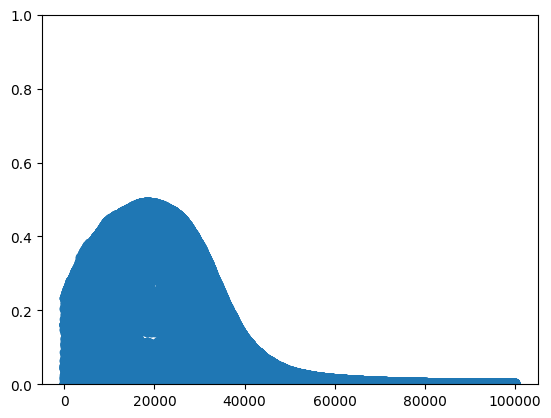

In [234]:
plt.ylim([0,1])
plt.scatter(range(steps+1),errorList)

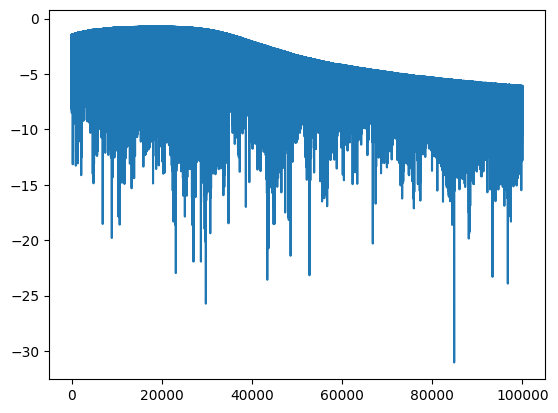

In [235]:
plt.plot(range(steps+1),np.log(errorList))

## 4. Application to test data set (new data)

In [236]:
testingOut

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [237]:
calculateNext(calculateNext(testingIn, weights[0]), weights[1])

array([[0.09634245, 0.86580206],
       [0.07162268, 0.92406583],
       [0.09564771, 0.91042694],
       [0.14404881, 0.82320217],
       [0.14082381, 0.82643825],
       [0.10016187, 0.86141578],
       [0.06409177, 0.92785732],
       [0.97240272, 0.04643831],
       [0.04306891, 0.93687857],
       [0.88028617, 0.16516202],
       [0.97214603, 0.04683755],
       [0.90270442, 0.14398525],
       [0.87780874, 0.1679058 ],
       [0.14264533, 0.82720721],
       [0.03314451, 0.95075709],
       [0.91395267, 0.13292168],
       [0.88055231, 0.16482837],
       [0.97240308, 0.04643775],
       [0.85329701, 0.18751084],
       [0.97237982, 0.0464748 ],
       [0.88051969, 0.16490275],
       [0.97236575, 0.04648825],
       [0.35822924, 0.62736867],
       [0.06470481, 0.92836315],
       [0.89918848, 0.13704509],
       [0.03491619, 0.9493036 ],
       [0.14082381, 0.82643824],
       [0.03424442, 0.94920631],
       [0.85632069, 0.1850037 ],
       [0.97143829, 0.04792635],
       [0.

In [238]:
testingOut.argmax(axis=1)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0], d

In [239]:
accuracy(testingIn,testingOut,weights)

0.9933333333333333